In [1]:
import matplotlib.pyplot as pl
import polars as po
import numpy as np
import pickle
from datetime import date
from scipy.stats import pearsonr


#%matplotlib widget

AGE_ORDER = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
FEATURES = ['Others behaviour', 'Authorities trust', 'Individual behaviour', 'Life degradation']

COLOURS = [
    '#00997D', # Paolo Veronese green
    '#a20252', # Jazzberry jam
    '#cc5803', # Tenne tawny
    '#81d473', # Mantis
    '#745296', # Royal purple
    '#555555', # Grey
    '#f5cc00', # Jonquil 
    '#679bf0', # Guilliman blue 
]

import matplotlib as mpl
from matplotlib import cycler

mpl.rcParams['axes.prop_cycle'] = cycler(color=COLOURS)

In [ ]:
epi = po.read_csv('hope_data/epidata.csv', parse_dates=True)
epi = epi.filter(po.col('region')=='Danmark').sort(by='date')
epi

In [2]:
hosp = po.read_csv('./hope_data/new_hosps_per_region_per_day_utf8.csv',
                   parse_dates=True,
                   encoding='utf8',
                   sep=';',
                  )
_hosp = (hosp.groupby('Dato').agg([
            po.col('Hospitalisations').sum().alias('hospit')
        ]).sort('Dato')
          .select([po.col('Dato').alias('date'), 'hospit'])
       )
_hosp

date,hospit
date,i64
2020-03-01,1
2020-03-03,1
2020-03-05,1
2020-03-06,4
2020-03-08,3
2020-03-09,9
2020-03-10,15
2020-03-11,10
2020-03-12,18


In [3]:
pl.figure()
pl.plot(epi['date'],epi['hospit'])
pl.plot(_hosp['date'],_hosp['hospit'])
#pl.yscale('log')
pl.figure()
#pl.plot(epi['date'],epi['cases'])
pl.plot(epi['date'],epi['cases_per_100000'])
pl.plot(epi['date'],epi['cases_per_100000'])
#pl.plot(epi['date'],epi['cases_per_100000_smoothed'])
_epi = epi.with_columns(po.col('cases_per_100000').rolling_mean(7,center=True))
pl.plot(_epi['date'],_epi['cases_per_100000'])
cases = _epi['cases_per_100000'].drop_nulls().to_numpy()
frequencies = np.fft.fft(np.log10(cases))

pl.figure()
x = np.fft.fftfreq(len(frequencies))
ndx = np.argsort(x)
#pl.plot(x[ndx],frequencies.real[ndx])
#pl.plot(x[ndx],frequencies.imag[ndx])
pl.plot(x[ndx],np.abs(frequencies)[ndx])
#pl.xlim(0,10)


NameError: name 'epi' is not defined

<Figure size 500x330 with 0 Axes>

In [4]:
hosp = _hosp.with_columns(po.col('hospit').rolling_mean(7,center=True))
hosp

date,hospit
date,f64
2020-03-01,null
2020-03-03,null
2020-03-05,null
2020-03-06,4.857143
2020-03-08,6.142857
2020-03-09,8.571429
2020-03-10,12.142857
2020-03-11,15.0
2020-03-12,19.285714


In [5]:
with open('result_data/contact_data_daily.pickle','rb') as f:
    contact_data = pickle.load(f)
    
contact_data

{'days': SeriesView(['2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
             '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
             '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15',
             '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19',
             '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
             '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27',
             '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31',
             '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04',
             '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08',
             '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12',
             '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16',
             '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20',
             '2020-08-21', '2020-08-22', '2020-08-23', '2020-08-24',
             '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
             '2020-08-29',

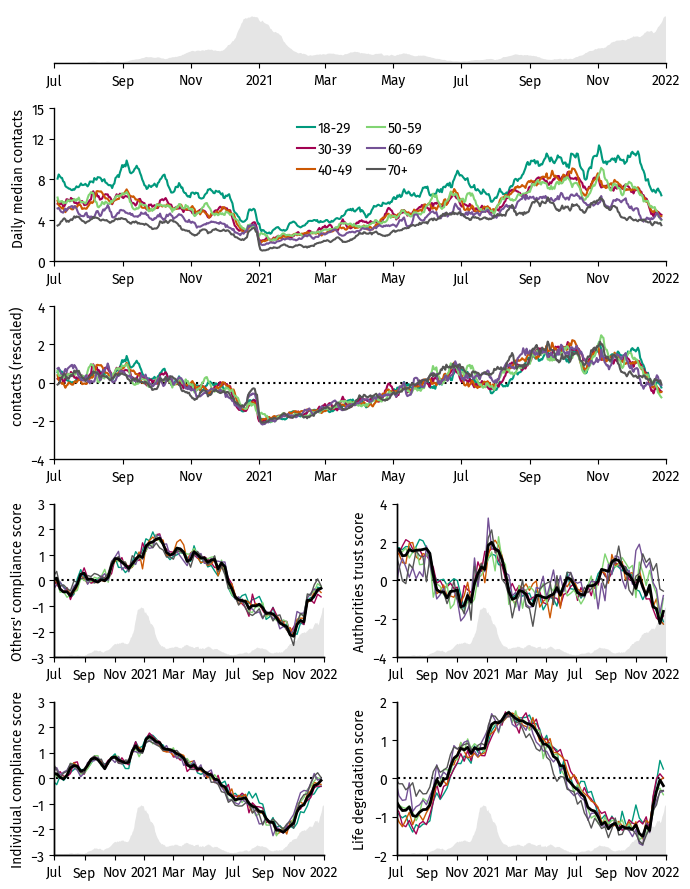

In [6]:
fig = pl.figure(figsize=(7,9))
spec = fig.add_gridspec(ncols=2, nrows=9)

ax_epi = fig.add_subplot(spec[0, :])
sharex_ax = ax_epi
ax_cont_raw = fig.add_subplot(spec[1:3,:],sharex=sharex_ax)
ax_cont_scl = fig.add_subplot(spec[3:5,:],sharex=sharex_ax)
feat_axes = [
    fig.add_subplot(spec[5:7,0],sharex=sharex_ax),
    fig.add_subplot(spec[5:7,1],sharex=sharex_ax),
    fig.add_subplot(spec[7:10,0],sharex=sharex_ax),
    fig.add_subplot(spec[7:10,1],sharex=sharex_ax),
]

ax_epi.fill_between(hosp['date'],np.zeros_like(hosp['hospit']), hosp['hospit'],alpha=0.1,facecolor='k')
ax_epi.yaxis.set_visible(False)
ax_epi.spines['left'].set_visible(False)
ax_epi.set_xlim([date(2020,7,1),date(2022,1,1)])
ax_epi.set_ylim(0,150)
#ax_epi.set_yscale('log')

ax_cont_raw.set_ylim(0,15)
ax_cont_raw.set_yticks([0,4,8,12,15])

ax_cont_scl.plot(contact_data['days'][[0,-1]],[0,0],'k:')

for aldercat in AGE_ORDER:
    ax_cont_raw.plot(contact_data['days'],contact_data['raw'][aldercat],label=aldercat)
    ax_cont_scl.plot(contact_data['days'],contact_data['scaled'][aldercat])
    
ax_cont_raw.legend(ncol=2)

ax_cont_raw.set_ylabel('Daily median contacts',loc='top')
ax_cont_scl.set_ylabel('contacts (rescaled)',loc='top')
   
for i, feat in enumerate(FEATURES):
    with open(f'result_data/{feat.replace(" ","_")}_Week.pickle','rb') as f:
        data = pickle.load(f)
        #print(data)
    t = data['days']
    ax = feat_axes[i]
    ax.plot(contact_data['days'][[0,-1]],[0,0],'k:')
    for a, age in enumerate(AGE_ORDER):
        ax.plot(t, data[age],lw=1)
    ax.plot(t, data['Y'],lw=2,c='k')
    ylim = ax.get_ylim()
    ymax = max(max(ylim),-min(ylim))
    ax.set_ylim([-ymax, ymax])
    yticks = ax.get_yticks()
    if i % 2 == 0:
        ax.set_ylim(-3,3)
        ax.set_yticks([-3,-2,-1,0,1,2,3])
    #print(yticks)
    #if ymax not in yticks:
      #  print(ymax)
        #yticks = [-ymax] + yticks + [ymax]
      #  print(yticks)
     #   ax.set_yticks(yticks)
    #ax.set_title(feat,loc='right')
    if i == 0:
        feat = "Others' compliance"
    if i == 2:
        feat = "Individual compliance"
    ax.set_ylabel(feat+' score')
    
    ax2 = ax.twinx()
    ax2.fill_between(hosp['date'],np.zeros_like(hosp['hospit']),hosp['hospit'],fc='k',alpha=0.1)
    ax2.set_ylim(0,400)
    #ax2.set_yscale('log')
    
    ax2.yaxis.set_visible(False)

fig.tight_layout()


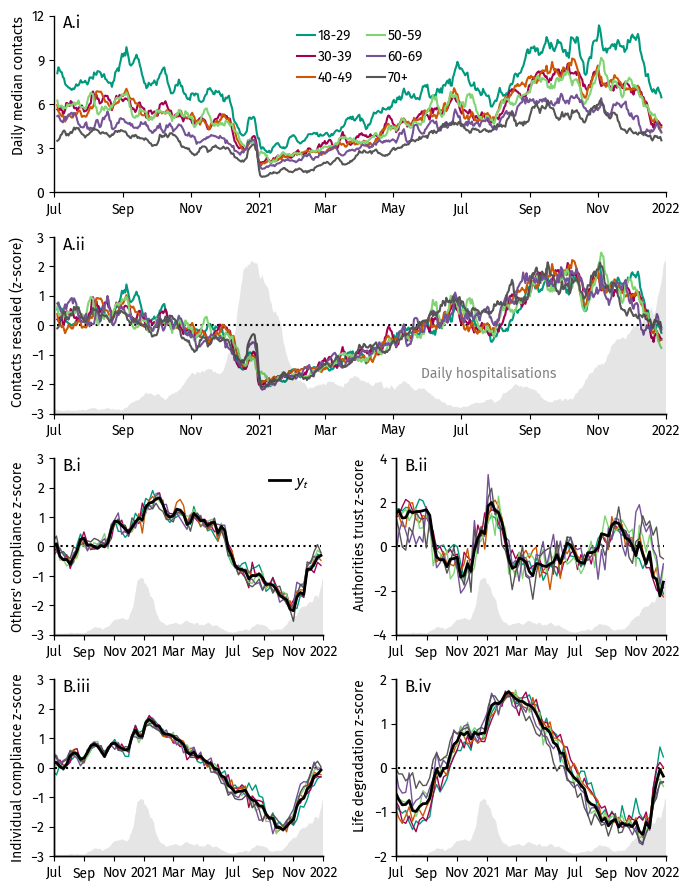

In [7]:
fig = pl.figure(figsize=(7,9))
spec = fig.add_gridspec(ncols=2, nrows=8)

ax_cont_raw = fig.add_subplot(spec[:2,:])
sharex_ax = ax_cont_raw
ax_cont_scl = fig.add_subplot(spec[2:4,:],sharex=sharex_ax)
feat_axes = [
    fig.add_subplot(spec[4:6,0],sharex=sharex_ax),
    fig.add_subplot(spec[4:6,1],sharex=sharex_ax),
    fig.add_subplot(spec[6:8,0],sharex=sharex_ax),
    fig.add_subplot(spec[6:8,1],sharex=sharex_ax),
]

ax_epi = ax_cont_scl.twinx()

ax_epi.fill_between(hosp['date'],np.zeros_like(hosp['hospit']), hosp['hospit'],alpha=0.1,facecolor='k')
ax_epi.yaxis.set_visible(False)
#ax_epi.spines['left'].set_visible(False)
ax_epi.set_xlim([date(2020,7,1),date(2022,1,1)])
ax_epi.set_ylim(0,150)
ax_epi.text(.6,0.2,'Daily hospitalisations',color='grey',transform=ax_epi.transAxes)
#ax_epi.set_yscale('log')

ax_cont_raw.set_ylim(0,12)
ax_cont_raw.set_yticks([0,3,6,9,12])

ax_cont_scl.plot(contact_data['days'][[0,-1]],[0,0],'k:')

ax_cont_scl.set_ylim([-3,3])
ax_cont_scl.set_yticks([-3,-2,-1,0,1,2,3])

for aldercat in AGE_ORDER:
    ax_cont_raw.plot(contact_data['days'],contact_data['raw'][aldercat],label=aldercat)
    ax_cont_scl.plot(contact_data['days'],contact_data['scaled'][aldercat])
    
ax_cont_raw.legend(ncol=2)

ax_cont_raw.set_ylabel('Daily median contacts',loc='top')
ax_cont_scl.set_ylabel('Contacts rescaled (z-score)',loc='top')

ax_cont_raw.text(0.015,1,'A.i',transform=ax_cont_raw.transAxes,va='top',fontsize='large')
ax_cont_scl.text(0.015,1,'A.ii',transform=ax_cont_scl.transAxes,va='top',fontsize='large')
   
for i, feat in enumerate(FEATURES):
    with open(f'result_data/{feat.replace(" ","_")}_Week.pickle','rb') as f:
        data = pickle.load(f)
        #print(data)
    t = data['days']
    ax = feat_axes[i]
    ax.plot(contact_data['days'][[0,-1]],[0,0],'k:')
    for a, age in enumerate(AGE_ORDER):
        ax.plot(t, data[age],lw=1)
    ax.plot(t, data['Y'],lw=2,c='k',label='$y_t$')
    ylim = ax.get_ylim()
    ymax = max(max(ylim),-min(ylim))
    ax.set_ylim([-ymax, ymax])
    yticks = ax.get_yticks()
    if i % 2 == 0:
        ax.set_ylim(-3,3)
        ax.set_yticks([-3,-2,-1,0,1,2,3])
    if i == 0:
        ax.legend(fontsize='large')
    #print(yticks)
    #if ymax not in yticks:
      #  print(ymax)
        #yticks = [-ymax] + yticks + [ymax]
      #  print(yticks)
     #   ax.set_yticks(yticks)
    #ax.set_title(feat,loc='right')
    ax.set_ylabel(feat+' z-score',loc='top')
    
    ax2 = ax.twinx()
    ax2.fill_between(hosp['date'],np.zeros_like(hosp['hospit']),hosp['hospit'],fc='k',alpha=0.1)
    ax2.set_ylim(0,400)
    #ax2.set_yscale('log')
    
    ax2.yaxis.set_visible(False)
    
    if i == 0:
        ax.set_ylabel("Others' compliance z-score")
    if i == 2:
        ax.set_ylabel("Individual compliance z-score")
    
    ax.text(0.03,1,'B.'+['i','ii','iii','iv'][i],transform=ax.transAxes,va='top',fontsize='large')

fig.tight_layout()
fig.savefig('figures/paper/features_scaled.pdf')

In [9]:
features = {}

for i, feat in enumerate(FEATURES):
    with open(f'result_data/{feat.replace(" ","_")}_Day.pickle','rb') as f:
        data = pickle.load(f)
    features[feat] = data
    
print(features['Others behaviour']['days'][[0,-1]])
print(contact_data['days'][[0,-1]])

['2020-07-01T00:00:00.000000000' '2021-12-31T00:00:00.000000000']
['2020-07-04' '2021-12-28']


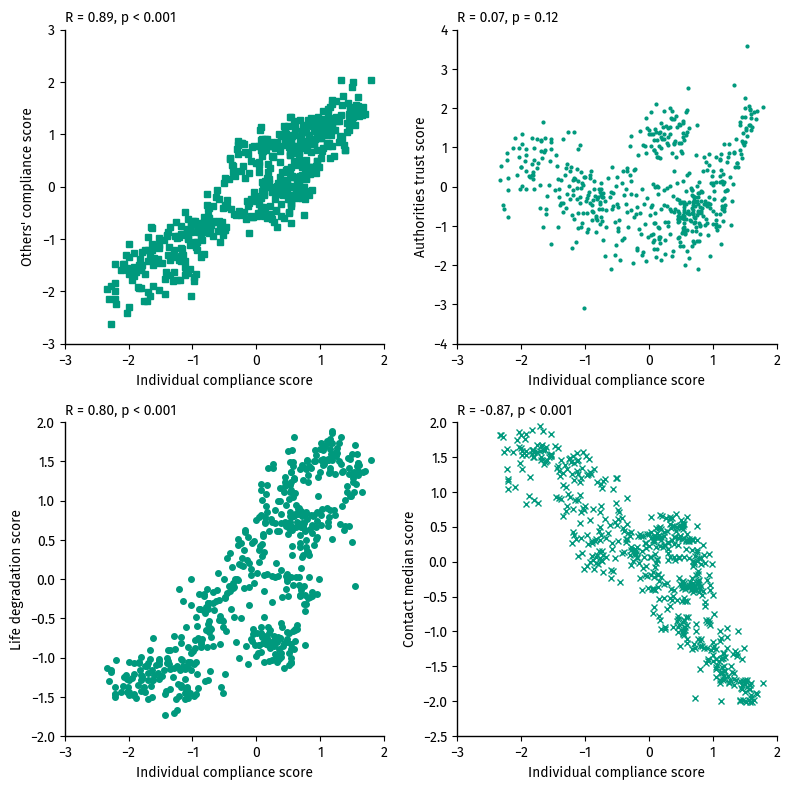

In [10]:
indiv = features['Individual behaviour']['Y'][3:-3]
other = features['Others behaviour']['Y'][3:-3]
trust = features['Authorities trust']['Y'][3:-3]
degrd = features['Life degradation']['Y'][3:-3]
cont = contact_data['scaled']['18+']

fig, axs = pl.subplots(2,2,figsize=(8,8))
ax = axs.flatten()
markers = ['s','.','o','x']

for i, (feat, timeseries) in enumerate([
        ('Others behaviour', other),
        ('Authorities trust', trust),
        ('Life degradation', degrd),
        ('Contact median', cont),
    ]):
    a = ax[i]
    a.plot(indiv, timeseries, markers[i])

    a.set_xlabel('Individual compliance score')
    if i == 0:
        feat = "Others' compliance"
    a.set_ylabel(f'{feat} score')

    R, p = pearsonr(indiv, timeseries)
    if p < 0.001:
        pstring = 'p < 0.001'
    else:
        pstring = f'p = {p:4.2f}'
        
    a.set_title(f'R = {R:4.2f}, {pstring}')

fig.tight_layout()
fig.savefig('figures/paper/feature_correlation.pdf')

In [11]:
df = po.read_csv('result_data/regions_with_temperature.csv',parse_dates=True)
df

region,Day,Others behaviour,Authorities trust,Individual behaviour,Life degradation,cases_per_100000,hospit_per_100000,deaths_per_100000,proportion_second_dose,Others behaviour_smooth,Authorities trust_smooth,Individual behaviour_smooth,Life degradation_smooth,cases_per_100000_smooth,hospit_per_100000_smooth,deaths_per_100000_smooth,temperature,temperature_smooth,Estimated # contacts
str,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Hovedstaden""",2020-07-01,4.788578,5.582487,5.173243,3.724138,0.323435,0.053906,0.0,0.0,null,null,null,null,null,null,null,15.891924,null,null
"""Hovedstaden""",2020-07-02,4.886253,5.46837,5.228305,3.537713,0.754683,0.107812,0.0,0.0,null,null,null,null,null,null,null,15.423255,null,null
"""Hovedstaden""",2020-07-03,4.723958,5.468387,5.117225,3.497758,0.592965,0.0,0.0,0.0,null,null,null,null,null,null,null,14.130059,null,null
"""Hovedstaden""",2020-07-04,4.680172,5.521709,5.087835,3.612069,0.539059,0.0,0.053906,0.0,4.746689,5.507204,5.133508,3.592095,0.485153,0.046205,0.023103,15.40997,14.808606,5.90361
"""Hovedstaden""",2020-07-05,4.734884,5.516348,5.102961,3.726098,0.431247,0.053906,0.0,0.0,4.748259,5.496079,5.127495,3.545915,0.585264,0.038504,0.023103,16.196792,14.380028,5.858901
"""Hovedstaden""",2020-07-06,4.785294,5.516289,5.074444,3.483333,0.26953,0.053906,0.107812,0.0,4.7498,5.512128,5.129047,3.537319,0.646871,0.030803,0.023103,13.73593,14.044699,5.722247
"""Hovedstaden""",2020-07-07,4.627684,5.47684,5.150541,3.563559,0.485153,0.053906,0.0,0.0,4.731905,5.522186,5.138259,3.528397,0.739281,0.038504,0.030803,12.872314,13.804766,5.75495
"""Hovedstaden""",2020-07-08,4.799564,5.504614,5.131155,3.400871,1.024212,0.0,0.0,0.0,4.766721,5.527089,5.156361,3.52451,0.81629,0.069308,0.023103,12.891877,13.570409,5.5611
"""Hovedstaden""",2020-07-09,4.897045,5.580713,5.239165,3.477541,1.18593,0.053906,0.0,0.0,4.774752,5.515211,5.155008,3.504173,0.862495,0.061607,0.023103,13.075955,13.25707,5.351809


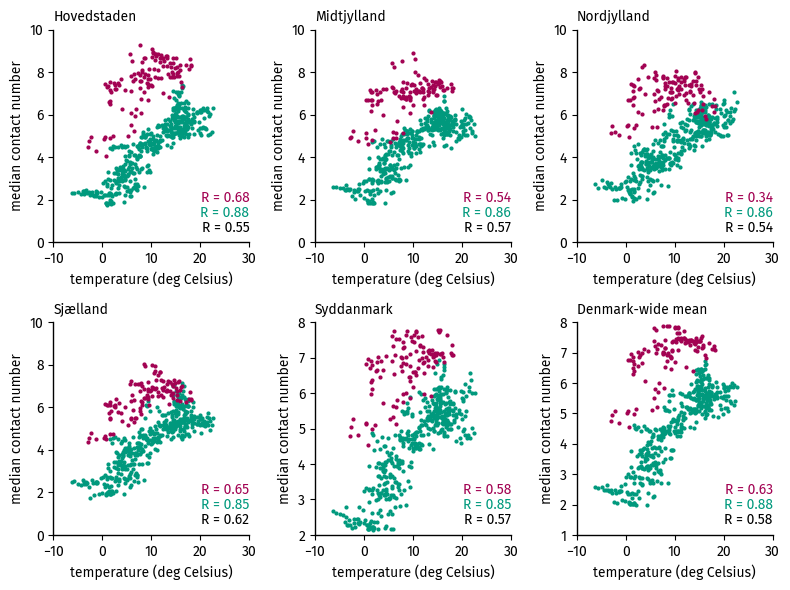

In [12]:
regs = df['region'].unique().sort()
fig, ax = pl.subplots(2,3,figsize=(8,6),)
ax = ax.flatten()
cutoff = date(2021,9,1)

def mini_analysis(_df,a,yR=0.05,plot=True):
    c = _df['Estimated # contacts']
    T = _df['temperature']
    if plot:
        handle, = a.plot(T, c,'.')
        color = handle.get_color()
    else:
        color='k'
    a.set_title(reg)
    R, p = pearsonr(T[3:-3],c[3:-3])
    a.text(1,yR,f'R = {R:4.2f}',transform=a.transAxes, ha='right',color=color)

for i, reg in enumerate(regs):
    a = ax[i]
    thisdf = df.filter(po.col('region')==reg).sort('Day')
    early = thisdf.filter(po.col('Day') < cutoff)
    later = thisdf.filter(po.col('Day') >= cutoff)
    mini_analysis(thisdf, a, 0.05, plot=False)
    mini_analysis(early, a, 0.12)
    mini_analysis(later, a, 0.19)
    
glob = df.groupby('Day').agg([
    po.col('Estimated # contacts').mean().alias('Estimated # contacts'),
    po.col('temperature').mean().alias('temperature'),
]).sort(by='Day')

early = glob.filter(po.col('Day') < cutoff)
later = glob.filter(po.col('Day') >= cutoff)

mini_analysis(glob, ax[-1], 0.05, plot=False)
mini_analysis(early, ax[-1], 0.12)
mini_analysis(later, ax[-1], 0.19)

ax[-1].set_title('Denmark-wide mean')
for a in ax:
    a.set_xlabel('temperature (deg Celsius)')
    a.set_ylabel('median contact number')
    

fig.tight_layout()
fig.savefig('figures/paper/temperature_contact_correlation.pdf')

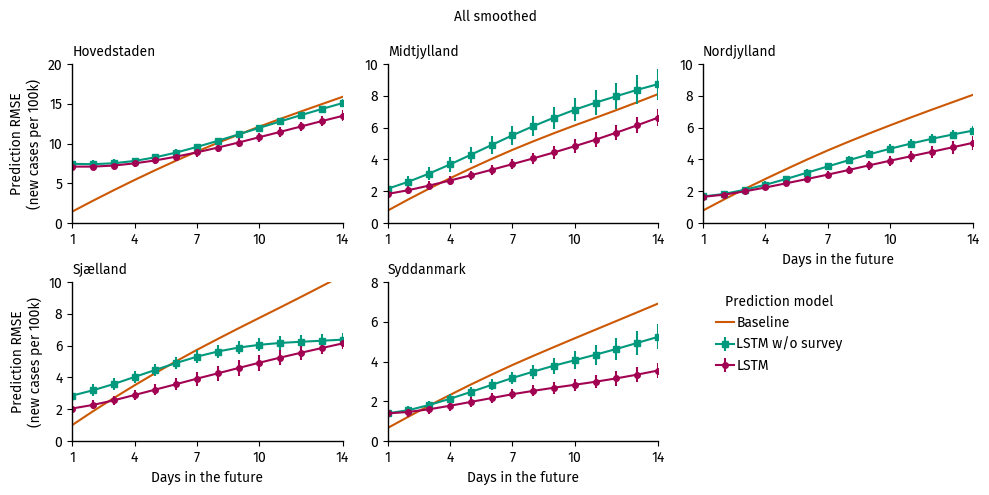

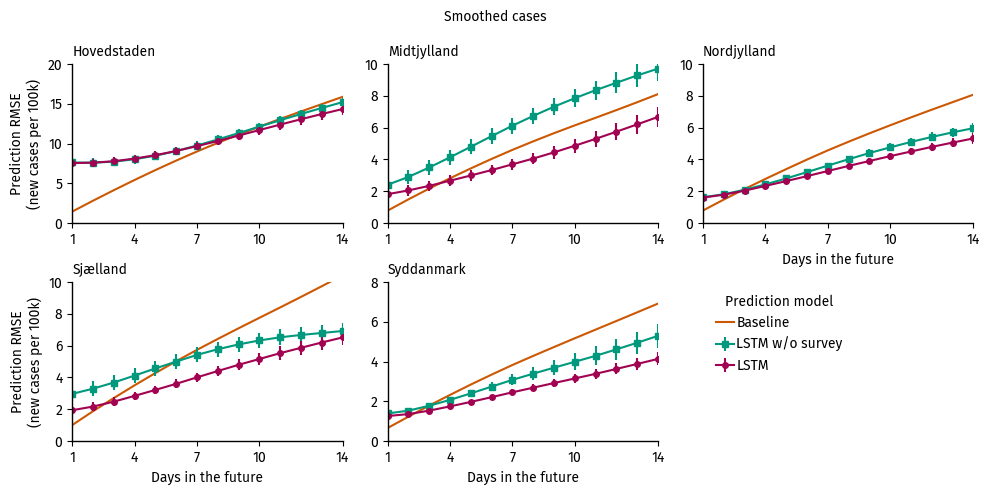

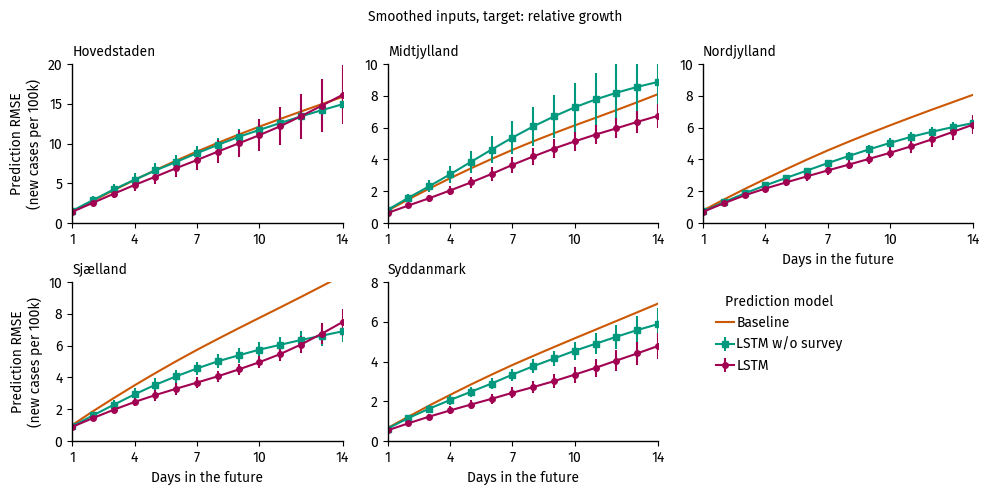

In [13]:
REGIONS = ['Hovedstaden', 'Midtjylland', 'Nordjylland', 'Sjælland', 'Syddanmark']
MARKERS = ['None','s','o']
COLUMNS = ['Baseline','LSTM w/o survey','LSTM']
qualifier_to_title = {
    '_non_smoothed':'Raw data',
    '_for_smoothed_cases':'Smoothed cases',
    '_for_smoothed_data':'All smoothed',
    '_for_smoothed_data_log_cases': 'All smoothed, log cases',
    '_relative_all_smoothed_inputs': 'Smoothed inputs, target: relative growth',
    '_relative':'Smoothed cases, target: relative growth',
    '_relative_from_relative':'Smoothed cases, Source and target: relative growth',
}

ALL_COMPARISON_QUALIFIERS = ['_non_smoothed', '_for_smoothed_data','_for_smoothed_data_log_cases','_relative','_relative_all_smoothed_inputs','_relative_from_relative']

for qualifier in ['_for_smoothed_data','_for_smoothed_cases','_relative_all_smoothed_inputs']: 
    fig, ax = pl.subplots(2,3,figsize=(10,5))
    ax = ax.flatten()
    with open(f'result_data/model_results{qualifier}.pickle','rb') as f:
        _data = pickle.load(f)
        res = _data['res']
        med = _data['med']
        std = _data['std']
    for r, region in enumerate(REGIONS):
        this_res = res[region].transpose()
        this_std = std[region].transpose()
        handles = []
        for c, column in enumerate(COLUMNS):
            RMSE = this_res[column].to_numpy()
            err = this_std[column].to_numpy()
            #handle, = ax[r].plot(np.arange(len(RMSE)), RMSE)
            #if column != 'Baseline':
            #    ax[r].fill_between(np.arange(len(RMSE)), RMSE-err, RMSE+err,color=handle.get_color(),alpha=0.1,ec='None')
            if column == 'Baseline':
                handle, = ax[r].plot(np.arange(len(RMSE))+1, RMSE, label=column,color=COLOURS[2])
            else:
                handle = ax[r].errorbar(np.arange(len(RMSE))+1, RMSE, err,marker=MARKERS[c],ms=4,label=column)
            handles.append(handle)
        ax[r].set_title(region)
        ax[r].set_xlim(1,14)
        ax[r].set_xticks([1,4, 7,10,14])
    ax[0].set_ylabel('Prediction RMSE\n(new cases per 100k)')
    ax[3].set_ylabel('Prediction RMSE\n(new cases per 100k)')
    for i in range(2, 5):
        ax[i].set_xlabel('Days in the future')

    if qualifier != '':
        for i in [1, 3]:
            ax[i].set_ylim(0,10)
    ax[-1].axis('off')
    #ax[-2].legend(loc='outside centcenter')
    #legend = ax[-2].legend(loc='upper left')
    #legend.remove()
    ax[-1].legend(handles,COLUMNS, loc='upper left', bbox_to_anchor=(0,1),title='Prediction model')
    fig.suptitle(qualifier_to_title[qualifier])
    #print(list(legend.get_lines()))
    fig.tight_layout()
    fig.savefig(f'./figures/paper/prediction_RMSE{qualifier}.pdf')

<BarContainer object of 1000 artists>

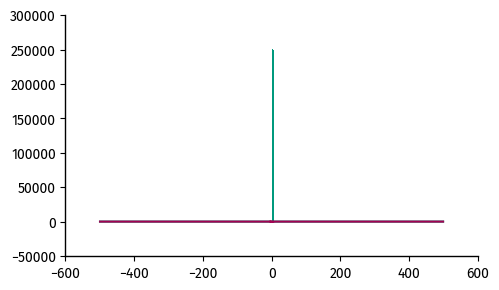

In [14]:
pl.figure()
t = np.linspace(0,1,1000)
frequencies = np.fft.fft(np.sin(2*np.pi*2*t)+np.sin(2*np.pi*5*t),)
x = np.fft.fftfreq(len(frequencies),d=t[1]-t[0])
ndx = np.argsort(x)
pl.plot(x[ndx],frequencies.real[ndx])
pl.plot(x[ndx],frequencies.imag[ndx])
pl.bar(x[ndx],np.abs(frequencies)[ndx]**2)
#pl.xlim(0,10)


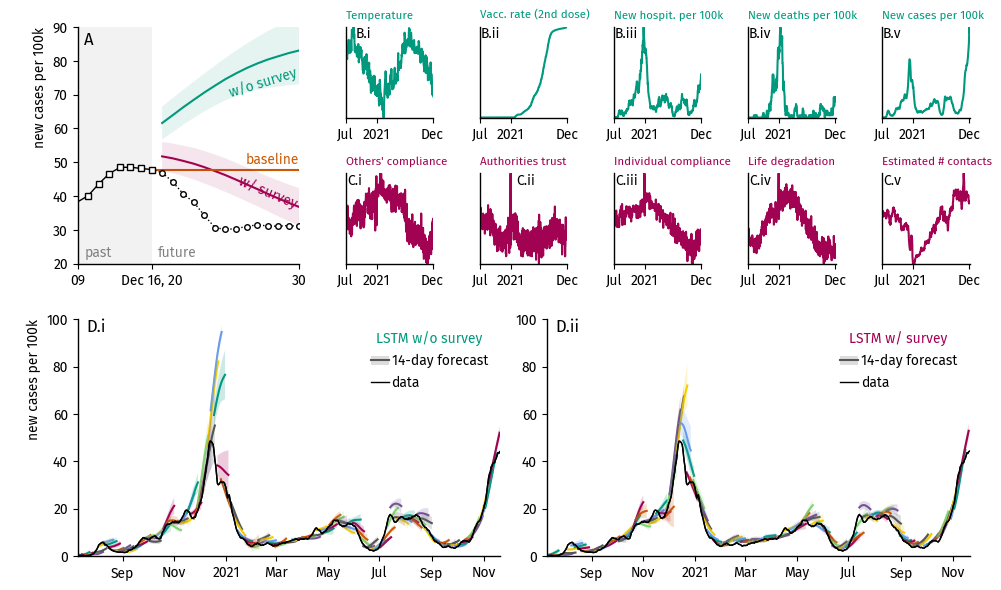

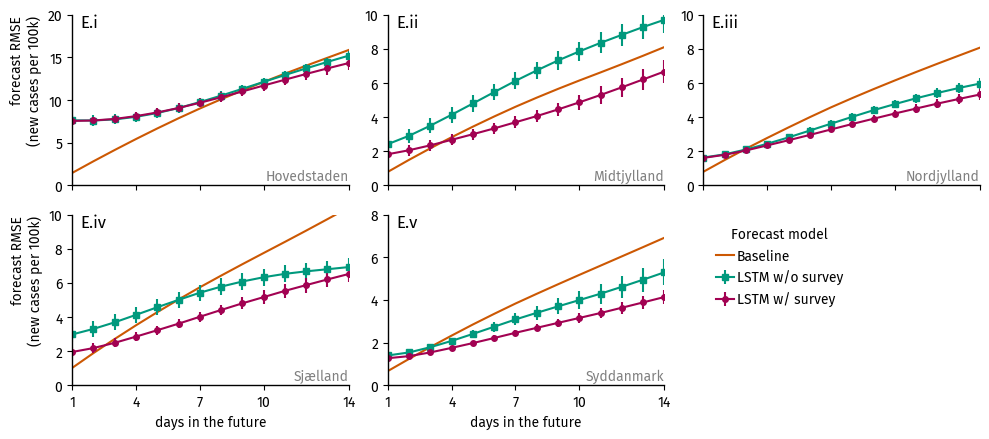

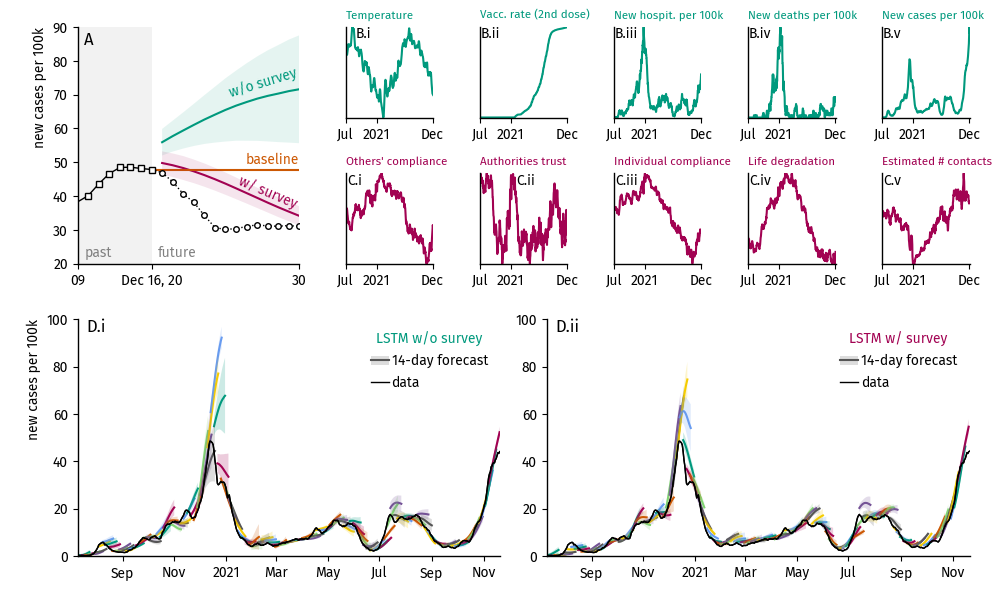

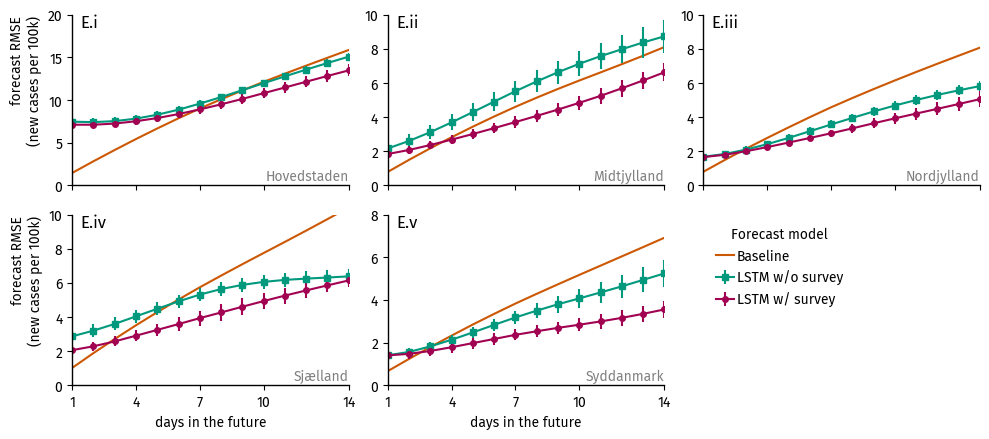

In [16]:
from sklearn.preprocessing import scale
from datetime import date

ROMAN = ['i','ii','iii','iv','v','vi']

for qualifier in ['_for_smoothed_cases', '_for_smoothed_data']:

    with open(f'result_data/model_results{qualifier}.pickle','rb') as f:
        results = pickle.load(f)


        res = results['res']
        std = results['std']
        forecast_wo_survey = results['forecast_wo_survey']
        forecast_full = results['forecast_full']
        y_today = results['y_today']
        dates_today = results['dates_today']

    if qualifier == '_for_smoothed_cases':
        SURVEY_FEATURES = FEATURES + ['Estimated # contacts']
        OTHER_FEATURES = ['temperature', 'proportion_second_dose', 'hospit_per_100000_smooth', 'deaths_per_100000_smooth', 'cases_per_100000_smooth']
    else:
        SURVEY_FEATURES = [f+'_smooth' for f in FEATURES] + ['Estimated # contacts']
        OTHER_FEATURES = ['temperature_smooth', 'proportion_second_dose', 'hospit_per_100000_smooth', 'deaths_per_100000_smooth', 'cases_per_100000_smooth']

    FEATURE_TITLE = {
        _FEATURE: _FEATURE.capitalize() if not _FEATURE.endswith('_smooth') else _FEATURE[:-7].capitalize()\
        for _FEATURE in SURVEY_FEATURES + OTHER_FEATURES
    }

    FEATURE_TITLE['proportion_second_dose'] = 'Vacc. rate (2nd dose)'
    FEATURE_TITLE['hospit_per_100000_smooth'] = 'New hospit. per 100k'
    FEATURE_TITLE['deaths_per_100000_smooth'] = 'New deaths per 100k'
    FEATURE_TITLE['cases_per_100000_smooth'] = 'New cases per 100k'
    FEATURE_TITLE['Others behaviour'] = "Others' compliance"
    FEATURE_TITLE['Individual behaviour'] = "Individual compliance"
    FEATURE_TITLE['Others behaviour_smooth'] = "Others' compliance"
    FEATURE_TITLE['Individual behaviour_smooth'] = "Individual compliance"
    
    fig = pl.figure(figsize=(10,6))
    gs = fig.add_gridspec(4, 14)

    ax0 = fig.add_subplot(gs[:2,:4])
    ax0.text(0.03,0.98,'A',va='top',transform=ax0.transAxes,fontsize='large')

    ax = []
    for i in range(2):
        ax.append([])
        for j in range(5):
            ax[i].append(fig.add_subplot(gs[i,4+2*j:4+2*(j+1)]))
    ax = np.array(ax)

    axp = np.array([fig.add_subplot(gs[2:,:7]), fig.add_subplot(gs[2:,7:]) ])
    #fig, ax = pl.subplots(2,5,figsize=(12,4))
    region = 'Midtjylland'
    df_X = df.filter(po.col("region")==region).drop_nulls()
    for i, _FEATURES in enumerate([OTHER_FEATURES, SURVEY_FEATURES]):
        for j, _FEATURE in enumerate(_FEATURES):
            ax[i,j].plot(df_X['Day'], scale(df_X[_FEATURE]),c=COLOURS[i])
            ax[i,j].set_title(FEATURE_TITLE[_FEATURE],fontsize='small',color=COLOURS[i])
            ax[i,j].set_yticks([])
            ax[i,j].set_xticks([date(2020,7,1),date(2021,1,1),date(2021,12,1)])
            #ax[i,j].set_xticks()

    #ax[i,j].set_ylabek

    for i, a in enumerate(ax[0,:]):
        a.text(0.015 + (0 if i> 0 else 0.1) ,1.0,'B.'+ROMAN[i],va='top',transform=a.transAxes,fontsize='medium')
    for i, a in enumerate(ax[1,:]):
        a.text(0.015 + (0 if i != 1 else 0.4) ,1.0,'C.'+ROMAN[i],va='top',transform=a.transAxes,fontsize='medium')

    #########


    FUTURE = 14
    PAST = 7

    labels = ['predictions using\nonly base features', 'predictions using\nbase and survey\nfeatures']

    test_region = region
    for j, _forecast in enumerate([forecast_wo_survey, forecast_full]):

        fc = _forecast[test_region]
        datahandle, = axp[j].plot(dates_today[test_region], y_today[test_region],lw=1,c='k')
        _mean = fc['forecast_mean']
        _std = fc['forecast_std']
        count = 0
        for t in range(0,_mean.shape[0]-FUTURE,4):
            _x = dates_today[test_region][np.arange(t+1, t+1+FUTURE)]
            handle, = axp[j].plot(_x, _mean[t, :],zorder=-1000)
            fill_handle = axp[j].fill_between(_x, _mean[t,:]- _std[t,:],_mean[t,:]+ _std[t,:],alpha=0.2,
                                              fc=handle.get_color(),)
            if count == 5 and j == 0 or count == 5 and j == 0:
                leg_handle = handle
                leg_fill_handle = fill_handle

            count += 1
        axp[j].set_ylim(0,axp[j].get_ylim()[-1])
        leg = axp[j].legend([(leg_handle, leg_fill_handle), datahandle], ['14-day forecast','data'],
                            title=['LSTM w/o survey', 'LSTM w/ survey'][j])
        pl.setp(leg.get_title(), color=COLOURS[j])

    #axp[0].set_title(test_region)
    axp[0].set_ylabel('\nnew cases per 100k',loc='top')
    #axp[0].text(0.02,1,'predictions using\nonly base features',transform=axp[0].transAxes,ha='left',va='top',color=COLOURS[0])
    #axp[1].text(0.02,1,'predictions using\nbase and survey\nfeatures',transform=axp[1].transAxes,ha='left',va='top',color=COLOURS[1])

    axp[0].text(0.02,1.0,'D.i',va='top',transform=axp[0].transAxes,fontsize='large')
    axp[1].text(0.02,1.0,'D.ii',va='top',transform=axp[1].transAxes,fontsize='large')
    #########

    t = 159
    #t = 129
    ndxPAST = np.arange(t-PAST+1,t+1)
    ndxFUT = np.arange(t+1, t+1+FUTURE)
    _x0 = dates_today[test_region][ndxPAST]
    ax0.plot(dates_today[test_region][:t+1], y_today[test_region][:t+1],'-',lw=1,c='k')
    ax0.plot(dates_today[test_region][t:], y_today[test_region][t:],':',lw=1,c='k')
    ax0.plot(dates_today[test_region][ndxPAST], y_today[test_region][ndxPAST],'s',lw=1,c='k',mfc='w')
    ax0.plot(dates_today[test_region][ndxFUT], y_today[test_region][ndxFUT],'o',lw=1,c='k',mfc='w')

    for j, _forecast in enumerate([forecast_wo_survey, forecast_full]):

        fc = _forecast[test_region]
        axp[j].plot(dates_today[test_region], y_today[test_region],lw=1,c='k')
        _mean = fc['forecast_mean']
        _std = fc['forecast_std']


        _x = dates_today[test_region][np.arange(t+1, t+1+FUTURE)]
        handle, = ax0.plot(_x, _mean[t, :],zorder=-1000)
        ax0.fill_between(_x, _mean[t,:]- _std[t,:],_mean[t,:]+ _std[t,:],alpha=0.1,
                         fc=handle.get_color(),)
        ax0.set_xlim(dates_today[test_region][[t-PAST, t+FUTURE]])
        ax0.set_ylim(20,90)
        #ax0.set_ylim(10,35)

    ndxBAS = np.arange(t, t+1+FUTURE)
    ax0.plot(dates_today[test_region][ndxBAS], len(ndxBAS)*[y_today[test_region][t]],'-',zorder=-1000)

    ax0.set_xticks(dates_today[test_region][[t-PAST,t,t+FUTURE]])
    ax0.set_xticklabels(['09',"Dec 16, 20", '30'])
    ax0.fill_between(
        dates_today[test_region][[t-PAST,t]],
        2*[ax0.get_ylim()[0]],
        2*[ax0.get_ylim()[1]],
        color='k',
        ec='None',
        alpha=0.05,
    )
    trAx = ax0.transAxes
    ax0.text(0.03,0.03,'past',transform=trAx,c='gray')
    ax0.text(0.36,0.03,'future',transform=trAx,c='gray')
    ax0.text(1.0,0.42,'baseline',transform=trAx,ha='right',color=COLOURS[2])
    ax0.text(1.0,0.7,'w/o survey',transform=trAx,ha='right',color=COLOURS[0],rotation=17)
    ax0.text(1.0,0.23,'w/ survey',transform=trAx,ha='right',color=COLOURS[1],rotation=-23)
    ax0.set_ylabel('\nnew cases per 100k',loc='top')

    # ============= Errors ==============



    fig.tight_layout()

    #fig.subplots_adjust(left=0.008,bottom=0.01)
    fig.savefig(f'figures/paper/Fig02a{qualifier}.pdf')
    fig.savefig(f'figures/paper/Fig02a{qualifier}.png',dpi=300)


    # ======================================================

    fig, ax = pl.subplots(2,3,figsize=(10,4.5),sharex=True)
    ax = ax.flatten()
    for r, region in enumerate(REGIONS):
        this_res = res[region].transpose()
        this_std = std[region].transpose()
        handles = []
        for c, column in enumerate(COLUMNS):
            RMSE = this_res[column].to_numpy()
            err = this_std[column].to_numpy()
            #handle, = ax[r].plot(np.arange(len(RMSE)), RMSE)
            #if column != 'Baseline':
            #    ax[r].fill_between(np.arange(len(RMSE)), RMSE-err, RMSE+err,color=handle.get_color(),alpha=0.1,ec='None')
            if column == 'Baseline':
                handle, = ax[r].plot(np.arange(len(RMSE))+1, RMSE, label=column,color=COLOURS[2])
            else:
                handle = ax[r].errorbar(np.arange(len(RMSE))+1, RMSE, err,marker=MARKERS[c],ms=4,label=column)
            handles.append(handle)
        ax[r].text(1.0,0.03,region,transform=ax[r].transAxes,ha='right',color='grey')
        ax[r].set_xlim(1,14)
        ax[r].set_xticks([1,4, 7,10,14])
    ax[0].set_ylabel('forecast RMSE\n(new cases per 100k)',loc='top')
    ax[3].set_ylabel('forecast RMSE\n(new cases per 100k)',loc='top')
    for i in range(3, 5):
        ax[i].set_xlabel('days in the future')

    for ia, a in enumerate(ax[:-1]):
        a.text(0.03,1.0,'E.'+ROMAN[ia],va='top',transform=a.transAxes,fontsize='large')

    if qualifier != '':
        for i in [1, 3]:
            ax[i].set_ylim(0,10)
    ax[-1].axis('off')
    #ax[-2].legend(loc='outside centcenter')
    #legend = ax[-2].legend(loc='upper left')
    #legend.remove()
    labels = list(COLUMNS)
    labels[-1] = labels[-1] + ' w/ survey'
    ax[-1].legend(handles,labels, loc='upper left', bbox_to_anchor=(0,1),title='Forecast model')
    #fig.suptitle(qualifier_to_title[qualifier])
    #print(list(legend.get_lines()))
    fig.tight_layout()
    #fig.subplots_adjust(top=1,hspace=0.15)
    fig.savefig(f'figures/paper/Fig02b{qualifier}.pdf')
    fig.savefig(f'figures/paper/Fig02b{qualifier}.png',dpi=300)


In [16]:
if False:
    
    from sklearn.preprocessing import scale
    from datetime import date


    with open('result_data/model_results_for_smoothed_data.pickle','rb') as f:
        results = pickle.load(f)


        res = results['res']
        std = results['std']
        forecast_wo_survey = results['forecast_wo_survey']
        forecast_full = results['forecast_full']
        y_today = results['y_today']
        dates_today = results['dates_today']

    SURVEY_FEATURES = [f+'_smooth' for f in FEATURES] + ['Estimated # contacts']
    OTHER_FEATURES = ['temperature_smooth', 'proportion_second_dose', 'hospit_per_100000_smooth', 'deaths_per_100000_smooth', 'cases_per_100000_smooth']

    FEATURE_TITLE = {
        _FEATURE: _FEATURE.capitalize() if not _FEATURE.endswith('_smooth') else _FEATURE[:-7].capitalize()\
        for _FEATURE in SURVEY_FEATURES + OTHER_FEATURES
    }

    FEATURE_TITLE['proportion_second_dose'] = 'Vacc. rate (2nd dose)'
    FEATURE_TITLE['hospit_per_100000_smooth'] = 'New hospit. per 100k'
    FEATURE_TITLE['deaths_per_100000_smooth'] = 'New deaths per 100k'
    FEATURE_TITLE['cases_per_100000_smooth'] = 'New cases per 100k'

    fig = pl.figure(figsize=(10,12))
    gs = fig.add_gridspec(20, 42)

    ax0 = fig.add_subplot(gs[:6,:12])

    ax = []
    for i in range(2):
        ax.append([])
        for j in range(5):
            ax[i].append(fig.add_subplot(gs[i*3:(i+1)*3,
                                            12+6*j:12+6*(j+1)]))
    ax = np.array(ax)

    axp = np.array([fig.add_subplot(gs[6:12,:21]), fig.add_subplot(gs[6:12,21:]) ])

    axerr = []
    for i in range(2):
        axerr.append([])
        for j in range(3):
            axerr[i].append(fig.add_subplot(gs[12+i*4:12+(i+1)*4,
                                               14*j:14*(j+1)]))
    axerr = np.array(axerr)

    #fig, ax = pl.subplots(2,5,figsize=(12,4))
    region = 'Midtjylland'
    df_X = df.filter(po.col("region")==region).drop_nulls()
    for i, _FEATURES in enumerate([OTHER_FEATURES, SURVEY_FEATURES]):
        for j, _FEATURE in enumerate(_FEATURES):
            ax[i,j].plot(df_X['Day'], scale(df_X[_FEATURE]),c=COLOURS[i])
            ax[i,j].set_title(FEATURE_TITLE[_FEATURE],fontsize='x-small',color=COLOURS[i])
            ax[i,j].set_yticks([])
            ax[i,j].set_xticks([date(2020,7,1),date(2021,1,1),date(2021,12,1)])
            #ax[i,j].set_xticks()

    #ax[i,j].set_ylabek

    fig.tight_layout()

    #########


    FUTURE = 14
    PAST = 7

    labels = ['predictions using\nonly base features', 'predictions using\nbase and survey\nfeatures']

    test_region = region
    for j, _forecast in enumerate([forecast_wo_survey, forecast_full]):

        fc = _forecast[test_region]
        datahandle, = axp[j].plot(dates_today[test_region], y_today[test_region],lw=1,c='k')
        _mean = fc['forecast_mean']
        _std = fc['forecast_std']
        count = 0
        for t in range(0,_mean.shape[0]-FUTURE,4):
            _x = dates_today[test_region][np.arange(t+1, t+1+FUTURE)]
            handle, = axp[j].plot(_x, _mean[t, :],zorder=-1000)
            fill_handle = axp[j].fill_between(_x, _mean[t,:]- _std[t,:],_mean[t,:]+ _std[t,:],alpha=0.3,
                                              fc=handle.get_color(),)
            if count == 5 and j == 0 or count == 5 and j == 0:
                leg_handle = handle
                leg_fill_handle = fill_handle

            count += 1
        axp[j].set_ylim(0,axp[j].get_ylim()[-1])
        leg = axp[j].legend([(leg_handle, leg_fill_handle), datahandle], ['14-day forecast','data'],
                            title=['LSTM w/o survey', 'LSTM w/ survey'][j])
        pl.setp(leg.get_title(), color=COLOURS[j])

    #axp[0].set_title(test_region)
    axp[0].set_ylabel('new cases per 100k',loc='top')
    #axp[0].text(0.02,1,'predictions using\nonly base features',transform=axp[0].transAxes,ha='left',va='top',color=COLOURS[0])
    #axp[1].text(0.02,1,'predictions using\nbase and survey\nfeatures',transform=axp[1].transAxes,ha='left',va='top',color=COLOURS[1])
    #fig.tight_layout()

    #########

    t = 159
    #t = 129
    ndxPAST = np.arange(t-PAST+1,t+1)
    ndxFUT = np.arange(t+1, t+1+FUTURE)
    _x0 = dates_today[test_region][ndxPAST]
    ax0.plot(dates_today[test_region][:t+1], y_today[test_region][:t+1],'-',lw=1,c='k')
    ax0.plot(dates_today[test_region][t:], y_today[test_region][t:],':',lw=1,c='k')
    ax0.plot(dates_today[test_region][ndxPAST], y_today[test_region][ndxPAST],'s',lw=1,c='k',mfc='w')
    ax0.plot(dates_today[test_region][ndxFUT], y_today[test_region][ndxFUT],'o',lw=1,c='k',mfc='w')

    for j, _forecast in enumerate([forecast_wo_survey, forecast_full]):

        fc = _forecast[test_region]
        axp[j].plot(dates_today[test_region], y_today[test_region],lw=1,c='k')
        _mean = fc['forecast_mean']
        _std = fc['forecast_std']


        _x = dates_today[test_region][np.arange(t+1, t+1+FUTURE)]
        handle, = ax0.plot(_x, _mean[t, :],zorder=-1000)
        ax0.fill_between(_x, _mean[t,:]- _std[t,:],_mean[t,:]+ _std[t,:],alpha=0.1,
                         fc=handle.get_color(),)
        ax0.set_xlim(dates_today[test_region][[t-PAST, t+FUTURE]])
        ax0.set_ylim(20,90)
        #ax0.set_ylim(10,35)

    ndxBAS = np.arange(t, t+1+FUTURE)
    ax0.plot(dates_today[test_region][ndxBAS], len(ndxBAS)*[y_today[test_region][t]],'-',zorder=-1000)

    ax0.set_xticks(dates_today[test_region][[t-PAST,t,t+FUTURE]])
    ax0.set_xticklabels(['09',"Dec 16, 20", '30'])
    ax0.fill_between(
        dates_today[test_region][[t-PAST,t]],
        2*[ax0.get_ylim()[0]],
        2*[ax0.get_ylim()[1]],
        color='k',
        ec='None',
        alpha=0.05,
    )
    trAx = ax0.transAxes
    ax0.text(0.03,0.03,'past',transform=trAx,c='gray')
    ax0.text(0.36,0.03,'future',transform=trAx,c='gray')
    ax0.text(1.0,0.42,'baseline',transform=trAx,ha='right',color=COLOURS[2])
    ax0.text(1.0,0.7,'w/o survey',transform=trAx,ha='right',color=COLOURS[0],rotation=17)
    ax0.text(1.0,0.23,'w/ survey',transform=trAx,ha='right',color=COLOURS[1],rotation=-23)
    ax0.set_ylabel('new cases per 100k',loc='top')
    #fig.tight_layout()

    # ============= Errors ==============

    if True:
        ax = axerr
        ax = ax.flatten()
        for r, region in enumerate(REGIONS):
            this_res = res[region].transpose()
            this_std = std[region].transpose()
            handles = []
            for c, column in enumerate(COLUMNS):
                RMSE = this_res[column].to_numpy()
                err = this_std[column].to_numpy()
                #handle, = ax[r].plot(np.arange(len(RMSE)), RMSE)
                #if column != 'Baseline':
                #    ax[r].fill_between(np.arange(len(RMSE)), RMSE-err, RMSE+err,color=handle.get_color(),alpha=0.1,ec='None')
                if column == 'Baseline':
                    handle, = ax[r].plot(np.arange(len(RMSE))+1, RMSE, label=column,color=COLOURS[2])
                else:
                    handle = ax[r].errorbar(np.arange(len(RMSE))+1, RMSE, err,marker=MARKERS[c],ms=4,label=column)
                handles.append(handle)
            #ax[r].set_title(region)
            ax[r].set_xlim(1,14)
            ax[r].set_xticks([1,4, 7,10,14])
        ax[0].set_ylabel('Forecast RMSE\n(new cases per 100k)',loc='top')
        ax[3].set_ylabel('Forecast RMSE\n(new cases per 100k)',loc='top')
        for i in range(2, 5):
            ax[i].set_xlabel('Days in the future')

        if qualifier != '':
            for i in [1, 3]:
                ax[i].set_ylim(0,10)
        ax[-1].axis('off')
        #ax[-2].legend(loc='outside centcenter')
        #legend = ax[-2].legend(loc='upper left')
        #legend.remove()
        ax[-1].legend(handles,COLUMNS, loc='upper left', bbox_to_anchor=(0,1),title='Prediction model')
        #fig.suptitle(qualifier_to_title[qualifier])
        #print(list(legend.get_lines()))
        #fig.tight_layout()
        #fig.savefig(f'./figures/paper/prediction_RMSE{qualifier}.pdf')
    fig.subplots_adjust(hspace=20, wspace=20)

    #fig.tight_layout()